<a href="https://colab.research.google.com/github/TinkerTechie/Gen-Ai-/blob/main/L3_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Worksheet: Supervised Learning – Linear Regression**

**The Scenario -** You are the Chief Data Scientist at UrbanPrice Analytics, a company building a system to predict house prices for a fast-growing city.

  * The predictions will be used to:
    - Approve home loans
    - Set market prices
    - Estimate future revenue
  * Even a small prediction error can cause huge financial loss.
  * After reviewing the system, you realize:
    - The prediction method must learn patterns from labeled data, not rely on guesses or rigid rules.

**Raw Labeled Dataset (House Price Prediction)**

  * This is labeled data.
  * The goal is to predict a numerical value.

  | House Size (sq ft) | Price (₹ Lakhs) |
| ------------------ | --------------- |
| 800                | 40              |
| 1000               | 60              |
| 1200               | 65              |
| 1500               | 75              |
| 1800               | 110             |


**Input features (X):** __________________________

**Target variable (y):** _________________________

* Why is this a Supervised Learning problem?

_____________________________________________________________________
_____________________________________________________________________
_____________________________________________________________________

**What Is Linear Regression?**

- Think Like a Human First
  - Imagine you are shown this information:
    - Bigger houses generally cost more
    - Smaller houses generally cost less

- If someone asks:
  - “What might a 1700 sq ft house cost?”

  - Without using rules:
    - Should the price be closer to ₹75 or ₹110?
    - Why?

**This act of drawing a reasonable straight trend through data is Linear Regression.**

****
**Linear Regression** is a supervised learning method that learns a straight-line relationship between input features and a numerical output, so it can make reasonable predictions for new, unseen data.

In [1]:
import pandas as pd
import numpy as np

data = {
    "House Size" : [800, 1000, 1200, 1500, 1800],
    "Price" : [40, 60, 65, 75, 110]
}

df = pd.DataFrame(data)
df

,House Size,Price
0,800,40
1,1000,60
2,1200,65
3,1500,75
4,1800,110


In [2]:
#Define Features and Labels
x = df['House Size']
y = df['Price']

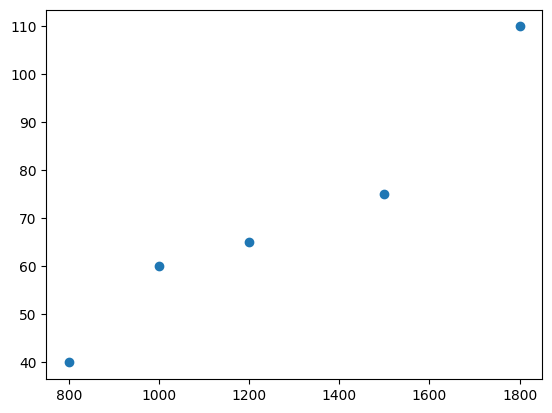

In [3]:
#scatter plot
import matplotlib.pyplot as plt
plt.scatter(x,y)


**The ML Shift (Linear Regression Thinking)**
- In Supervised Learning, we don't write rules; we learn the trend.
- **Intuition Check:** If you drew a straight line through those points, would it point up or down? This is the **Trend.** Linear Regression is simply the quest for the **"Best-Fit Line"** that minimizes the distance to all data points.

**Model Formulation & Assumptions**

To move from intuition to engineering, we use the Linear Regression Equation:$$y = mx + c$$

* $y$: Predicted Output
* $x$: Input Feature
* $m$ (Slope): The "Weight"—how much $y$ changes when $x$ moves.
* $c$ (Intercept): The "Bias"—the value of $y$ when $x$ is zero.

In [4]:
#Some random slope & Intercept
m1 = 0.08
c1 = -30

y1 = m1 * x + c1
print(y1)

0     34.0
1     50.0
2     66.0
3     90.0
4    114.0
Name: House Size, dtype: float64


In [7]:
#Some random slope & Intercept
m2 = 0.06
c2 = -10
y2 = m2 * x + c2
print(y2)


0    38.0
1    50.0
2    62.0
3    80.0
4    98.0
Name: House Size, dtype: float64


In [9]:
#Some random slope & Intercept
m3 = 0.02
c3 = 40
y3 = m3 * x + c3
print(y3)



0    56.0
1    60.0
2    64.0
3    70.0
4    76.0
Name: House Size, dtype: float64


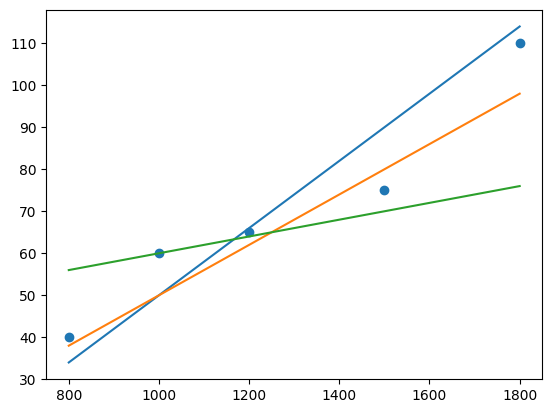

In [10]:
#Scatter plots and with lines generated from above equations
plt.scatter(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)

**How Does Linear Regression Choose the “Best” Line?**

* The Core Question
  - When many straight lines could fit the data…
    - Which one should the model choose?

* Linear Regression answers this using a simple idea:
  - Choose the line that makes the smallest overall mistakes.

**Prediction Error (Residuals)**

For each data point:
  - Error = Actual Value − Predicted Value

    - Positive error → prediction too low
    - Negative error → prediction too high

These errors are called **residuals.**

In [16]:
#Error 1
error1 = y - y1
print(error1)

0     6.0
1    10.0
2    -1.0
3   -15.0
4    -4.0
dtype: float64


In [20]:
#Error 2
error2 = y - y2
print(error2)

0     2.0
1    10.0
2     3.0
3    -5.0
4    12.0
dtype: float64


In [21]:
#Error 3
error3 = y - y3
print(error3)

0   -16.0
1     0.0
2     1.0
3     5.0
4    34.0
dtype: float64


****

**Why Not Just Add All Errors?**

If we add errors directly:

- Positive and negative errors cancel out

- A bad model might look “good” by accident

So we do something clever

**The OLS Trick**

Linear Regression:

- Squares every error (removes negative signs)

- Adds them all together

- Chooses the line with the smallest total squared error

**This is called:**

- Ordinary Least Squares (OLS)

****

In [18]:
#Sum of squared error 1
squared_err_1 = (error1 ** 2).sum()
print(squared_err_1)


378.0


In [22]:
#Sum of squared error 2
squared_err_2 = (error2 ** 2).sum()
print(squared_err_2)

282.0


In [23]:
#Sum of squared error 3
squared_err_3 = (error3**2).sum ()
print(squared_err_3)

1438.0


**OLS in One Sentence**

- OLS finds the straight line that minimizes the total squared distance between the predicted values and the actual values.
- Once the “best” line is found using OLS, it can be written as:
  - y=mx+c

**Formulas**
- The Slope ($m$): (OLS Result)
  $$m = \frac{\sum (x - \bar{x})(y - \bar{y})}{\sum (x - \bar{x})^2}$$

- The Intercept ($c$):
  $$c = \bar{y} - m\bar{x}$$

**How to Read These Formulas**
- **Slope Formula Explained in Words**

  - Slope = “How x and y move together” ÷ “How much x varies”

- Breakdown:
  - $(x - \bar{x})$  -   Input Deviation  -  How far a specific temperature is from the "average day."

  - $(y - \bar{y})$  -    Output Deviation - How far the energy demand is from the "average demand."

  - Numerator	      - The Covariance	-  Does demand go up when the temperature goes up? If both are positive (or both negative), the product is positive, indicating a positive relationship.

  - Denominator     - The Variance   -   This "normalizes" the formula. It measures the total spread/fluctuation of $x$. Without this, the model wouldn't know the scale of the input.

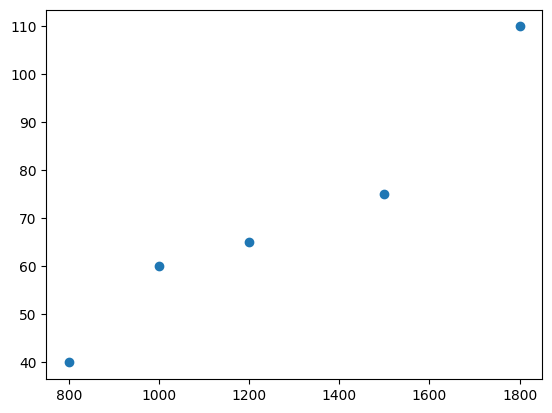

In [24]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

plt.show()

* “Does a straight-line relationship roughly exist?”

* “Are prices increasing with size?”

**Compute Mean Values (The Anchor Point)**

- OLS forces the regression line to pass through the average point.

In [ ]:
#Mean of X & y

In [ ]:
#Calculate slope

In [ ]:
#Calculate Intercept

In [ ]:
#The final Regression equation

In [ ]:
#Make a Prediction

In [ ]:
#Make prediction on whole data

In [ ]:
#Final sum of squared error

In [ ]:
#Final plotting

**Linear Regression using Scikit-Learn**

In [ ]:
#Features and labels
X = df[["House Size"]]
y = df["Price"]

In [ ]:
#Import and train Model

In [ ]:
#Extract slope & Intercept

In [ ]:
#The Learned wquation

In [ ]:
#Make Prediction

In [ ]:
#Compare actual & Predicted prices

In [ ]:
#Visualise regression Line

**Case Study**

**Description:**
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

**Variables:**
Hours Studied: The total number of hours spent studying by each student.
Previous Scores: The scores obtained by students in previous tests.
Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).
Sleep Hours: The average number of hours of sleep the student had per day.
Sample Question Papers Practiced: The number of sample question papers the student practiced.
Target Variable:

**Performance Index:** A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.
The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#read data
df = pd.read_csv('/content/Student_Performance.csv')

df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [ ]:
#Count null values
df.isna().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


In [ ]:
#Copy of data frame
df1 = df.copy()

In [ ]:
#Data encoding
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df1['Extracurricular Activities'] = encoder.fit_transform(df['Extracurricular Activities'])

In [ ]:
#Define features and labels
X = df1[['Hours Studied',	'Previous Scores',	'Extracurricular Activities',	'Sleep Hours',	'Sample Question Papers Practiced']]
y = df1['Performance Index']

In [ ]:
#Spliting data for training & testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,y , train_size = 0.25)

In [ ]:
#Import library and train model
from sklearn.linear_model import LinearRegression
modelA = LinearRegression()
modelA.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
X.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [ ]:
#Model coefficients
modelA.coef_

array([2.86521243, 1.02099852, 0.51320401, 0.48804707, 0.18053412])

In [ ]:
#Model intercept
modelA.intercept_

np.float64(-34.299880478029536)

In [ ]:
#Make predictions
ytrainP = modelA.predict(xtrain)
ytestP = modelA.predict(xtest)

In [ ]:
#Calculate errors
mean_squared_error_train_data = ((ytrain - ytrainP)**2).mean()

mean_squared_error_test_data = ((ytest - ytestP)**2).mean()

In [ ]:
print("Mean squared error on train data" , mean_squared_error_train_data)

Mean squared error on train data 4.1144560598947


In [ ]:
print("Mean squared error on test data" , mean_squared_error_test_data)

Mean squared error on test data 4.175855856432885


In [ ]:
#Make predictions on new data
HoursStudied = 3
PreviousScores = 78
ExtracurricularActivities = 1
SleepHours = 7
SampleQuestionPapersPracticed = 4

print(modelA.predict([[HoursStudied, PreviousScores, ExtracurricularActivities, SleepHours, SampleQuestionPapersPracticed]]))

[58.58531142]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
